In [1]:

#!/usr/bin/env python

try:
    # For Python 3.0 and later
    from urllib.request import urlopen
except ImportError:
    # Fall back to Python 2's urllib2
    from urllib2 import urlopen

import json

def get_jsonparsed_data(url):
    """
    Receive the content of ``url``, parse it as JSON and return the object.

    Parameters
    ----------
    url : str

    Returns
    -------
    dict
    """
    response = urlopen(url)
    data = response.read().decode("utf-8")
    return json.loads(data)

stock = 'AAPL'


In [2]:
import pandas as pd

In [3]:
# a = get_jsonparsed_data(url)

In [4]:
# stock

In [5]:
def get_data(url):
    json_data = get_jsonparsed_data(url)
    key = [i for i in json_data.keys() if i !='symbol'][0]
    return json_data[key]


In [6]:
def parse_json_to_df(json_data):
    metrics = pd.DataFrame(json_data)
    metrics['date'] = pd.DatetimeIndex(metrics['date'])
    metrics['date'] = pd.DatetimeIndex(metrics['date'].astype(str).str[0:8] + '01')
    
    metrics.columns =  metrics.columns.str.lower().str.replace(' ','_')
    return metrics

In [7]:
# url

In [8]:
# json_data = get_data(url)
# df = parse_json_to_df(json_data)

In [9]:
# url

In [10]:
sp = pd.read_csv('constituents_csv.csv')

In [11]:
sp.columns

Index(['Symbol', 'Name', 'Sector'], dtype='object')

In [12]:
nasdaq = pd.read_csv('nasdaqlisted.txt',sep='|')

In [13]:
import pickle
file = open('stocks_s.pkl', 'wb')
# not_found = pickle.load(open('not_found.pkl','rb'))
sp_not_found = []

In [14]:
df_list = []
for i,row in sp.iterrows():
    try:
        stock = row['Symbol']
        sector = row['Sector']
        
        if stock in sp_not_found:
            continue
        name = row['Name']


        url = 'https://financialmodelingprep.com/api/v3/company-key-metrics/%s?period=quarter'%stock
        json_data = get_data(url)
        metrics = parse_json_to_df(json_data)
        url = 'https://financialmodelingprep.com/api/v3/historical-price-full/%s?period=quarter'%stock
        try: 
            json_data = get_data(url)
        except Exception as e: 
            print (stock,e)
        stock_df = parse_json_to_df(json_data).loc[:,['date','close','volume']]
        stock_df = stock_df.groupby('date')[['close','volume']].mean().reset_index()
        stock_df.columns = ['date','close','volume']
        df = pd.merge(metrics,stock_df,on = ['date'])
        df['stock'] = stock  
        df['name'] = name
        df['sector'] = sector
        df_list.append(df)

    except:
        print('Didnt work for ',stock)
        sp_not_found.append(stock)
    if i % 50 == 0:
        print('\tSaving to ',file,len(df_list))
        pickle.dump(df_list, file)


	Saving to  <_io.BufferedWriter name='stocks_s.pkl'> 1
Didnt work for  AET
Didnt work for  GOOG
Didnt work for  ANDV
	Saving to  <_io.BufferedWriter name='stocks_s.pkl'> 48
BRK.B list index out of range
Didnt work for  BRK.B
BF.B list index out of range
Didnt work for  BF.B
Didnt work for  CA
	Saving to  <_io.BufferedWriter name='stocks_s.pkl'> 95
Didnt work for  CSRA
Didnt work for  DISCK
	Saving to  <_io.BufferedWriter name='stocks_s.pkl'> 143
Didnt work for  EVHC
Didnt work for  ESRX
	Saving to  <_io.BufferedWriter name='stocks_s.pkl'> 191
Didnt work for  GGP
	Saving to  <_io.BufferedWriter name='stocks_s.pkl'> 240
Didnt work for  LUK
	Saving to  <_io.BufferedWriter name='stocks_s.pkl'> 289
Didnt work for  KORS
Didnt work for  MON
Didnt work for  NFX
Didnt work for  NWS
	Saving to  <_io.BufferedWriter name='stocks_s.pkl'> 335
Didnt work for  PX
Didnt work for  COL
	Saving to  <_io.BufferedWriter name='stocks_s.pkl'> 383
Didnt work for  SCG
Didnt work for  TWX
	Saving to  <_io.Buffer

In [16]:
# pickle.dump(df_list, file)
# output = pd.concat(df_list)
# output.to_csv('stock_metrics_sp.gzip',index = False,compression = 'gzip')


In [26]:
url = 'https://financialmodelingprep.com/api/v3/symbol/available-indexes'
json_data = get_jsonparsed_data(url)
indexes = pd.DataFrame(json_data)

In [27]:
indexes

,symbol,name,currency,stockExchange,exchangeShortName
0,^STI,STI Index,SGD,SES,INDEX
1,^BVSP,IBOVESPA,BRL,Sao Paolo,INDEX
2,^MXX,IPC MEXICO,MXN,Mexico,INDEX
3,^GSPTSE,S&P/TSX Composite index,CAD,Toronto,INDEX
4,^VIX,CBOE Volatility Index,USD,Chicago Options,INDEX
5,^DJI,Dow Jones Industrial Average,USD,DJI,INDEX
6,^FCHI,CAC 40,EUR,Paris,INDEX
7,^N100,EURONEXT 100,EUR,Paris,INDEX
8,IMOEX.ME,MOEX Russia Index,RUB,MCX,INDEX
9,^AXJO,S&P/ASX 200,AUD,ASX,INDEX


In [ ]:
# file = open('not_found.pkl', 'wb')
# pickle.dump(string_list, file)


In [63]:
idx = 'sp'

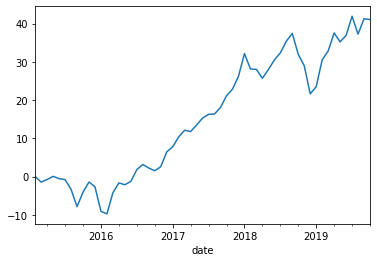

In [66]:
(df.groupby('date')['sp_percent'].mean() * 100).plot()

In [69]:
import seaborn as sns

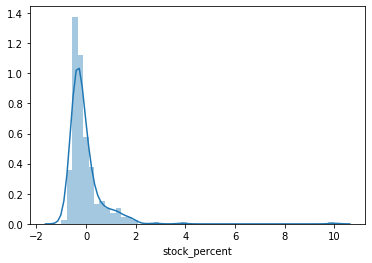

In [71]:
sns.distplot(df.groupby('stock')['stock_percent'].last())

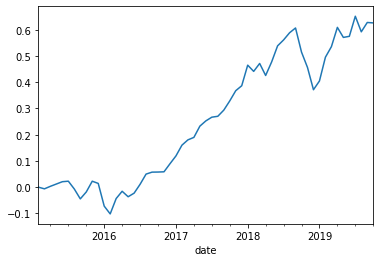

In [23]:
df = df.sort_values('date')

In [ ]:
df[df['stock'] == 'COF']